In [1]:
#https://www.youtube.com/watch?v=tMPfZV_ipOg&t=1s
#Facebook Stock Prediction using Machine Learning Algo called 
#Support Vector Regression (SVR)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from pandas_datareader import data as wb

In [13]:
#load data-1 month FB data
stock = pd.DataFrame()
#stock['FB'] = wb.DataReader('FB',data_source = 'yahoo', start = '2019-05-01',end = '2019-06-01')['Open']
stock['FB'] = wb.DataReader('FB',data_source = 'yahoo', start = '2020-03-01',end = '2020-04-01')['Open']

dates =[]
for x in range(len(stock)):
    newdate = str(stock.index[x])
    newdate = newdate[0:10]
    dates.append(newdate)

stock['dates'] = dates

stock.head()
stock['dates'], stock['FB']

(Date
 2020-03-02    2020-03-02
 2020-03-03    2020-03-03
 2020-03-04    2020-03-04
 2020-03-05    2020-03-05
 2020-03-06    2020-03-06
 2020-03-09    2020-03-09
 2020-03-10    2020-03-10
 2020-03-11    2020-03-11
 2020-03-12    2020-03-12
 2020-03-13    2020-03-13
 2020-03-16    2020-03-16
 2020-03-17    2020-03-17
 2020-03-18    2020-03-18
 2020-03-19    2020-03-19
 2020-03-20    2020-03-20
 2020-03-23    2020-03-23
 2020-03-24    2020-03-24
 2020-03-25    2020-03-25
 2020-03-26    2020-03-26
 2020-03-27    2020-03-27
 2020-03-30    2020-03-30
 2020-03-31    2020-03-31
 2020-04-01    2020-04-01
 Name: dates, dtype: object,
 Date
 2020-03-02    194.029999
 2020-03-03    196.220001
 2020-03-04    189.169998
 2020-03-05    186.779999
 2020-03-06    178.330002
 2020-03-09    169.600006
 2020-03-10    174.669998
 2020-03-11    174.009995
 2020-03-12    159.539993
 2020-03-13    163.529999
 2020-03-16    152.320007
 2020-03-17    150.740005
 2020-03-18    139.750000
 2020-03-19    146.6199

In [14]:
#create X and Y datasets
dates = []
prices = []
#get number of rows + columns in dataset
stock.shape

(23, 2)

In [19]:
tail = stock.tail(1)
stock = stock.head(len(stock)-1)
stock.shape

(21, 2)

In [20]:
#create independent data set x as dates
dates=[]
for date in stock['dates']:
    dates.append([int(date.split('-')[2])])

#create dependent data set y as prices
prices = []
for open_price in stock['FB']:
    prices.append(float(open_price))

dates

[[2],
 [3],
 [4],
 [5],
 [6],
 [9],
 [10],
 [11],
 [12],
 [13],
 [16],
 [17],
 [18],
 [19],
 [20],
 [23],
 [24],
 [25],
 [26],
 [27],
 [30]]

In [21]:
#function to make predictions using 3 different support vector regression models with 3 different types of kernals

def predict_prices(dates,prices,x):
    #create 3 support vector regression models
    svr_lin = SVR(kernel = 'linear', C=1e3)   #linear kernal
    svr_poly = SVR(kernel = 'poly', C = 1e3)    #polynomial kernel
    svr_rbf = SVR(kernel = 'rbf', C = 1e3, gamma = 0.1)    #polynomial kernel
    
    #train on dates and prices
    svr_lin.fit(dates,prices)
    svr_poly.fit(dates,prices)
    svr_rbf.fit(dates,prices)
    
    #Plot models on a graph to see which has best fit
    plt.scatter(dates,prices, color = 'black', label = 'Data')
    plt.scatter(dates,svr_rbf.predict(dates), color = 'red', label = 'rbf')
    plt.scatter(dates,svr_lin.predict(dates), color = 'green', label = 'linear')
    plt.scatter(dates,svr_poly.predict(dates), color = 'blue', label = 'poly')
    
    #label axis
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    
    plt.show()
    #return all 3 model predictions
    return svr_rbf.predict(x)[0], svr_lin.predict(x)[0],svr_poly.predict(x)[0]

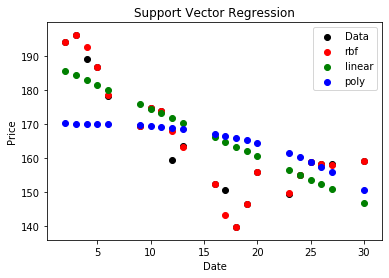

(156.45238886701662, 145.3800109863411, 148.7495569251771)


In [22]:
predict_price = predict_prices(dates,prices,[[31]])
print(predict_price)

In [23]:
tail

,FB,dates
Date,,
2020-03-31,165.479996,2020-03-31
